Coefficients:
  Coefficient 0: 13.239477824153255
  Coefficient 1: 6.1324376323455
  Coefficient 2: 2.392265542522523
  Coefficient 3: 7.746810379973795

Regression Equation:
y = 13.2395 + 6.1324 * X1 + 2.3923 * X2 + 7.7468 * X3
Degree of Polynomial: 3


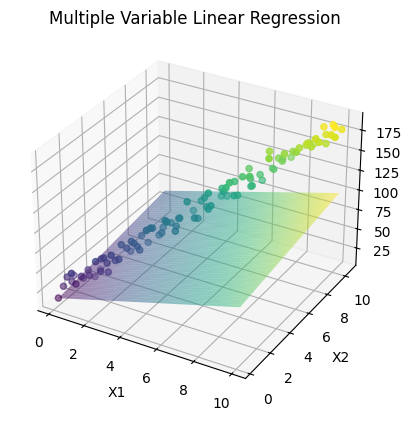

In [1]:
import csv
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error,root_mean_squared_error,r2_score

def transpose(matrix):
    return [[matrix[j][i] for j in range(len(matrix))] for i in range(len(matrix[0]))]

def multiply_matrices(A, B):
    result = [[0] * len(B[0]) for _ in range(len(A))]
    for i in range(len(A)):
        for j in range(len(B[0])):
            for k in range(len(B)):
                result[i][j] += A[i][k] * B[k][j]
    return result

def invert_matrix(matrix):
    n = len(matrix)
    identity = [[0] * n for _ in range(n)]
    for i in range(n):
        identity[i][i] = 1

    for col in range(n):
        diagonal_element = matrix[col][col]
        for j in range(n):
            matrix[col][j] /= diagonal_element
            identity[col][j] /= diagonal_element

        for i in range(n):
            if i != col:
                factor = matrix[i][col]
                for j in range(n):
                    matrix[i][j] -= factor * matrix[col][j]
                    identity[i][j] -= factor * identity[col][j]

    return identity

def linear_regression_matrix_inverse(X, y):
    X_b = [[1] + row for row in X]
    X_transpose = transpose(X_b)
    XTX_inv = invert_matrix(multiply_matrices(X_transpose, X_b))
    XTY = multiply_matrices(X_transpose, [[yi] for yi in y])

    beta = multiply_matrices(XTX_inv, XTY)

    return [entry[0] for entry in beta]

def regression_equation(coefficients):
    degree = len(coefficients) - 1
    equation = f"y = {coefficients[0]:.4f}"
    for i in range(1, degree + 1):
        equation += f" + {coefficients[i]:.4f} * X{i}"
    return equation

file_path = 'Data4.csv' 
try:
    with open(file_path, 'r') as file:
        reader = csv.reader(file)
        header = next(reader, None)
        data = [list(map(float, row)) for row in reader]
except FileNotFoundError:
    print(f"File not found: {file_path}")
    exit()

X = [row[:-1] for row in data] 
y = [row[-1] for row in data] 

coefficients = linear_regression_matrix_inverse(X, y)

print("Coefficients:")
for i, coef in enumerate(coefficients):
    print(f"  Coefficient {i}: {coef}")

equation = regression_equation(coefficients)
print("\nRegression Equation:")
print(equation)
print("Degree of Polynomial:", len(coefficients) - 1)

if X and len(X[0]) > 0:
    num_features = len(X[0])

    if num_features == 1:
        X_values = [row[0] for row in X]
        plt.scatter(X_values, y, label="Data Points")

        X_range = np.linspace(min(X_values), max(X_values), 100)
        y_pred = [coefficients[0] + coefficients[1] * x for x in X_range]

        plt.plot(X_range, y_pred, color='red', label="Regression Line")

        plt.legend()
        plt.title("Linear Regression")
        plt.xlabel("X1")
        plt.ylabel("y")
        plt.show()
    elif num_features == 2:
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')

        X_values_1 = [row[0] for row in X]
        X_values_2 = [row[1] for row in X]

        scatter = ax.scatter(X_values_1, X_values_2, y, label="Data Points")

        X_range_1 = np.linspace(min(X_values_1), max(X_values_1), 100)
        X_range_2 = np.linspace(min(X_values_2), max(X_values_2), 100)
        X_range_1, X_range_2 = np.meshgrid(X_range_1, X_range_2)
        y_pred_3d = (
            coefficients[0] +
            coefficients[1] * X_range_1 +
            coefficients[2] * X_range_2
        )

        plot_surface = ax.plot_surface(X_range_1, X_range_2, y_pred_3d, alpha=0.5, color='red')

        ax.set_xlabel('X1')
        ax.set_ylabel('X2')
        ax.set_zlabel('y')
        ax.set_title("Multiple Variable Linear Regression")

        handles = [scatter, plot_surface]
        labels = ['Data Points', 'Regression Hyperplane']
        ax.legend(handles, labels)

        plt.show()
    elif num_features == 3:
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')

        X_values_1 = [row[0] for row in X]
        X_values_2 = [row[1] for row in X]
        X_values_3 = [row[2] for row in X]

        scatter = ax.scatter(X_values_1, X_values_2, y, c=y, cmap='viridis', label="Data Points")

        X_range_1 = np.linspace(min(X_values_1), max(X_values_1), 100)
        X_range_2 = np.linspace(min(X_values_2), max(X_values_2), 100)
        X_range_1, X_range_2 = np.meshgrid(X_range_1, X_range_2)

        y_pred_2d = (
            coefficients[0] +
            coefficients[1] * X_range_1 +
            coefficients[2] * X_range_2
        )

        plot_surface = ax.plot_surface(X_range_1, X_range_2, y_pred_2d, alpha=0.5, cmap='viridis')

        ax.set_xlabel('X1')
        ax.set_ylabel('X2')
        ax.set_zlabel('y')
        ax.set_title("Multiple Variable Linear Regression")

        handles = [scatter, plot_surface]
        labels = ['Data Points', 'Regression Hyperplane']

        plt.show()

    else:
        print("Plotting is currently supported for datasets with up to three features.")
else:
    print("Empty dataset. Unable to plot.")


In [2]:
regressor = LinearRegression()
regressor.fit(X, y)

print("\nCoefficients from scikit-learn:")
print("  Intercept:", regressor.intercept_)
print("  Coefficients:", regressor.coef_)

equation_sklearn = f"y = {regressor.intercept_} + " + \
                    " + ".join([f"{coef:.4f} * X{i}" for i, coef in enumerate(regressor.coef_)])
print("\nRegression Equation from scikit-learn:")
print(equation_sklearn)





Coefficients from scikit-learn:
  Intercept: 13.239477824154704
  Coefficients: [6.13243763 2.39226554 7.74681038]

Regression Equation from scikit-learn:
y = 13.239477824154704 + 6.1324 * X0 + 2.3923 * X1 + 7.7468 * X2


In [43]:
X_pred = [[1] + row for row in X]
y_pred = multiply_matrices(X_pred, [[coef] for coef in coefficients])
mae = mean_absolute_error(y,y_pred)
print(f"MAE:{mae}")
mse = mean_squared_error(y, y_pred)
print(f"Mean Squared Error (MSE): {mse}")
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")
r_square = r2_score(y,y_pred)
print(f"r_square(R^2):{r_square}")

MAE:5.155505630417284
Mean Squared Error (MSE): 34.62048082941042
Root Mean Squared Error (RMSE): 5.883917133118924
r_square(R^2):0.9841749058942384


In [46]:
y_pred_sklearn = regressor.predict(X)


mae_sklearn = mean_absolute_error(y, y_pred_sklearn)
print(f"Mean absolute Error (MAE) using scikit-learn: {mae_sklearn}")

mse_sklearn = mean_squared_error(y, y_pred_sklearn)
print(f"Mean Squared Error (MSE) using scikit-learn: {mse_sklearn}")

rmse_sklearn = np.sqrt(mse_sklearn)
print(f"Root Mean Squared Error (RMSE) using scikit-learn: {rmse_sklearn}")

r_square_sklearn = r2_score(y, y_pred_sklearn)
print(f"R_Square (R^2) using scikit-learn: {r_square_sklearn}")

Mean Squared Error (MSE) using scikit-learn: 5.155505630416842
Mean Squared Error (MSE) using scikit-learn: 34.62048082941043
Root Mean Squared Error (RMSE) using scikit-learn: 5.883917133118925
R_Square (R^2) using scikit-learn: 0.9841749058942384


In [22]:
import pandas as pd

df = pd.read_csv("Data4.csv")

X1 = df['x1']
X2 = df['x2']
X3 = df['x3']
Y = df['y']



In [28]:
def gradient_descent(column1, column2, column3, target, learning_rate, epochs):

    n = len(target)  
    intercept = 0 
    coeff1 = 0
    coeff2 = 0
    coeff3 = 0

    for _ in range(epochs):

        intercept_sum = 0
        for i in range(n):
            q = intercept + coeff1 * column1[i] + coeff2 * column2[i] + coeff3 * column3[i] - target[i]
            intercept_sum = intercept_sum + q
        intercept_new = intercept - learning_rate * ((2/n) * intercept_sum)
        intercept = intercept_new

        coeff1_sum = 0
        for i in range(n):
            q = intercept * column1[i] + coeff1 * column1[i]**2 + coeff2 * column2[i] * column1[i] + \
                coeff3 * column3[i] * column1[i] - target[i] * column1[i]
            coeff1_sum = coeff1_sum + q
        coeff1_new = coeff1 - learning_rate * ((2/n) * coeff1_sum)
        coeff1 = coeff1_new

        coeff2_sum = 0
        for i in range(n):
            q = intercept * column2[i] + coeff1 * column1[i] * column2[i] + coeff2 * column2[i]**2 + \
                coeff3 * column3[i] * column2[i] - target[i] * column2[i]
            coeff2_sum = coeff2_sum + q
        coeff2_new = coeff2 - learning_rate * ((2/n) * coeff2_sum)
        coeff2 = coeff2_new

        coeff3_sum = 0
        for i in range(n):
            q = intercept * column3[i] + coeff1 * column1[i] * column3[i] + coeff2 * column2[i] * column3[i] + \
                coeff3 * column3[i]**2 - target[i] * column3[i]
            coeff3_sum = coeff3_sum + q
        coeff3_new = coeff3 - learning_rate * ((2/n) * coeff3_sum)
        coeff3 = coeff3_new

    return (coeff1, coeff2, coeff3, intercept)

result = gradient_descent(X1, X2, X3, Y, 0.01, 5000)
print(result)


(6.060680904900987, 2.44513478619853, 7.7667645007963015, 13.185782039300122)


In [33]:
predicted_Y_GD = []
for i in range(100):
  r1 = 13.18578203958556 + 6.060680905255514 * X1[i] + 2.445134785871812 * X2[i] + 7.766764500756425 * X3[i]
  predicted_Y_GD.append(r1)

In [41]:
mae = mean_absolute_error(y_true=Y,y_pred=predicted_Y_GD)
mse = mean_squared_error(y_true=Y,y_pred=predicted_Y_GD)
rmse = root_mean_squared_error(y_true=Y,y_pred=predicted_Y_GD)
r_square = r2_score(Y, predicted_Y_GD)

print("AmE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)
print("r_square:",r_square)

MAE: 5.155022267931194
MSE: 34.62081600700139
RMSE: 5.883945615571356
r_square: 0.9841747526838615
